# Graph Analysis and Visualization

The aim of this notebook is to analyze a weighted graph and his nodes building evrything (the graph, the algorithms, the functionalities) from scratch.

## Overview

1. Building the graph

2. Functionality 1 - Overall features of the graph

3. Functionality 2 - Find the best users

4. Functionality 3 - Shortest ordered route

At each functionality will be embedded a visualization that will help to understand the results.

## 1. Collecting the data

The datasets we'll use are all coming from _Stackoverflow_ (https://snap.stanford.edu/data/sx-stackoverflow.html) but have three different natures:

    - Answers to questions - User u answered user v's question at time t
    
    - Comments to questions - User u commented on user v's question at time t
    
    - Comments to answers - User u commented on user v's answer at time t

We'll preload the already processed data to speed-up but down here there is the code to redo the same operations

Loading the files

In [2]:
a2q, c2a, c2q, graph = f.loading_data()

We decided to test our functions on a subset of the dataframes just to speed up the computations.

Our dataset goes from `Friday 1 August 2008 05:17:57` to `Sunday 6 March 2016 12:18:13` GMT.   
We will then be working only from `Wednesday 1 January 2014 00:00:00` to `Friday 1 January 2016 00:00:00` 


In [11]:
start = 1388534400
end = 1451606400 

In [12]:
# this commands allow us to select the given interval and parse the dates

out = f.subset_with_parsing(start, end, 'date', a2q, c2a, c2q)
a2q, c2a, c2q = out[0], out[1], out[2]

#### Building the weighted graph

first of all we will assign a weight of the link for when an answer has been given to a question.    
an answer link will provide weight of 1   
a comment to answer link will provide weight of 0.4   
a comment to question link will provide weight of 0.2   


the way we will do it is via dictionaries :    
if node a is connected to node b with weight 3, our graph will result in :   
    ```graph = { 'a' = { 'b' : 3 } }```

if node a is also connected to node c with weight 1.5, our graph will result in :   
    ```graph = { 'a' = { 'b' : 3,  'c' : 1.5 } }```  

and so on..   

In [3]:
weights = [1, 0.4, 0.2]
source = 'replier'
destination = 'questioner'

In [ ]:
graph = f.create_weighted_graph(weights, source, destination, a2q, c2a, c2q)

## Functionality 1 - Get the overall features of the graph

This functionality returns in output a table with all the main features of the graph and the plot of its degree distribution on a logaritmic scale in order to be more readable

╔══════════════════════════════════╦═════════╗
║             Directed             ║  True   ║
╠══════════════════════════════════╬═════════╣
║         Number of users          ║ 1511105 ║
╠══════════════════════════════════╬═════════╣
║    Number of answers/comments    ║ 6365565 ║
╠══════════════════════════════════╬═════════╣
║ Average number of links per user ║  4.21   ║
╠══════════════════════════════════╬═════════╣
║          Density degree          ║   0.0   ║
╠══════════════════════════════════╬═════════╣
║              Dense               ║  False  ║
╚══════════════════════════════════╩═════════╝


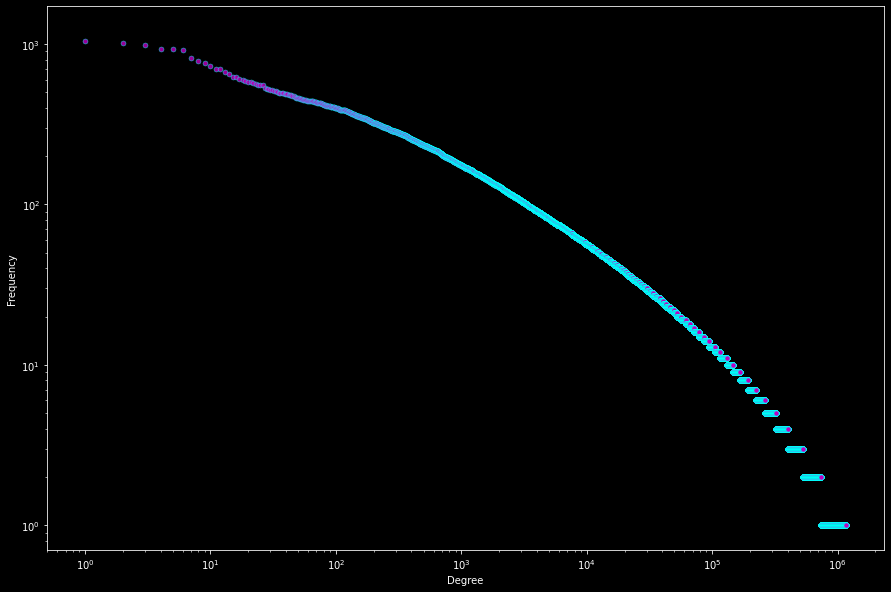

In [3]:
f.functionality1(a2q)

## Functionality 2 - Find the best users!

To run all the different metrics we decided to use an interval of time of two day that goes from `1 January 2014` to `2 January 2014`.
For what concernes the beetweenness and PageRank we decided to nor run them on the whole graph for computational reasons, but to test their correctness we created a simple testing graph.

Every metric implemented in this functionality has a different interpretation so we will briefly introduce all of them one by one

### Degree centrality

The degree centrality is defined as the number of links incident upon a node but in the case of directed graphs we distinguish between in-degree centrality and out-degree centrality because they have different interpretations.
A high value of the in-degree centrality can be interpreted as the 'popularity' of a node, while the out-degree as 'gregariousness'.

$Deg(v) = \frac{degree(v)}{N-1}$

### Closeness centrality

The closeness centrality is defined as the ratio between the number of nodes in the graph N minus 1 and the sum of the weighted cost of the shortest paths between the node and all other nodes in the graph.
In this way we can have an idea of the closeness of one node to all the others, the higher the value the lower the sum of the shortest paths with all the other nodes.

$Closeness(v) = \frac{N-1}{\sum_{u} d(u,v)}$

### Betweenness

The betweenness centrality of a node **v** is defined as the sum of the ratio between all the shortest path between two nodes **u** and **w** and the number of short paths between **u** and **w** that contain **v**.
Its value represents the degree of which the node stands between all the other nodes of the graph, so a high value means that a node is really influent in the relationships between other users.


$Betweenness(v) = \sum_{(u,w)} \frac{s_{u,v,w}}{s_{u,w}}$

Where $s_{u,v,w}$ is the number of shortest paths that contain **v**

In [4]:
Gnx, Gdict = f.init_sample_dicts()

2.0

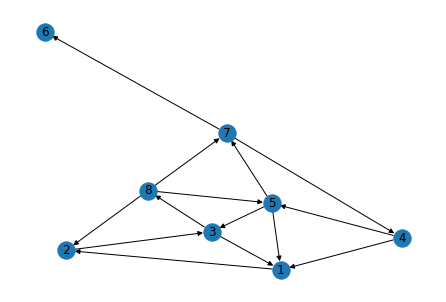

In [5]:
nx.draw(Gnx, with_labels = True)
f.betweeness(Gdict, 3)

### Page Rank

PageRank computes the importance of a node by looking at how many other nodes point to him, in small words it computes the probability that a user will arrive at a certain node/page by randomly surfing the graph. This means 

0.15889516486956712

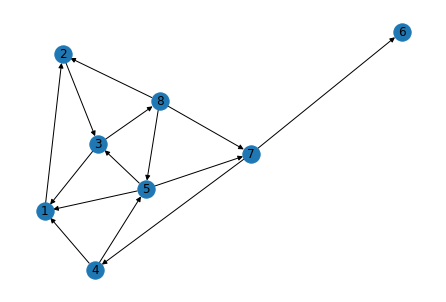

In [8]:
nx.draw(Gnx, with_labels = True)
f.pagerank(Gdict, user = 2, alpha = 0.7, iterations = 100)

### Now we finally launch the functionality
The output will be the value of the chosen metric and a graph representing the selected user and his links. Every link will have a different width given by the strength (weight) of his relationship (edge).

Result for user's 95190 closeness : 0.3816760657887309


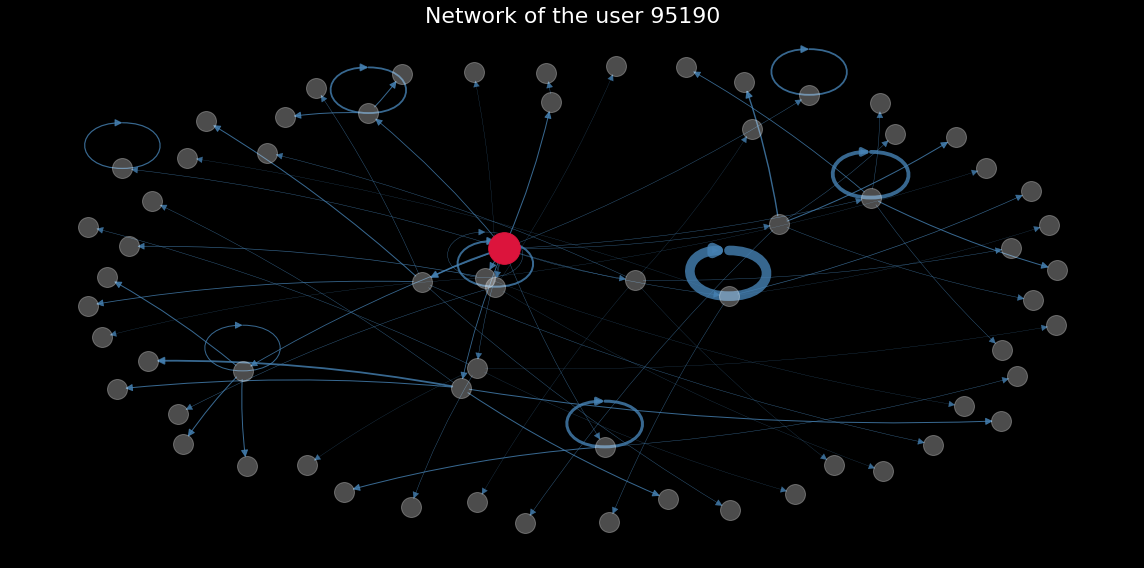

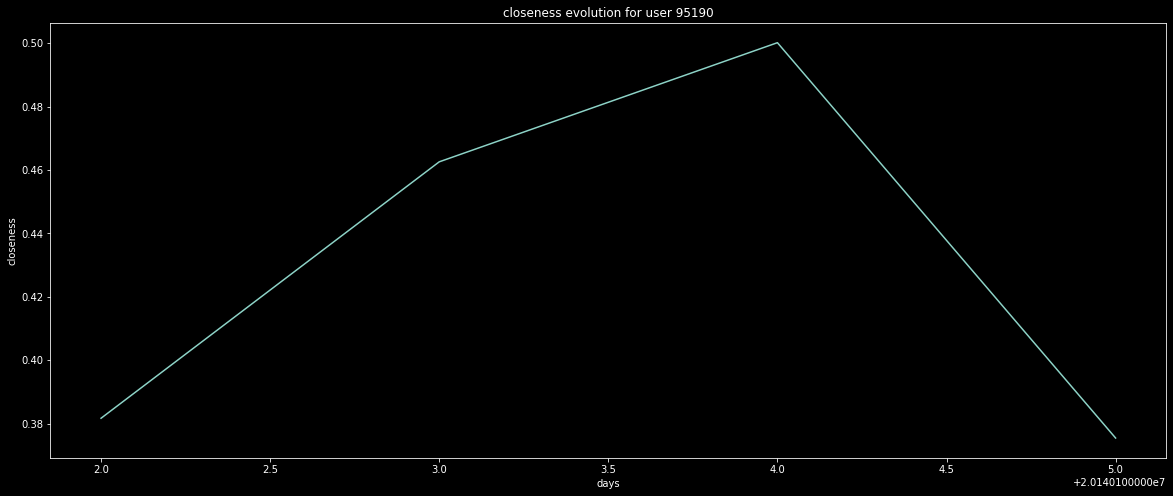

In [9]:
f.functionality2(20140101, 20140102, '95190', 'closeness')

## Functionality 3 - Shortest Ordered Route

Solved by implementing a modified version of Dijkstra's algorithm

The functionality will output the best path found by the algorithm with a plot of the path highlighted with thicker edges and a different color. The nodes that are part of the path are represented in red, while their neighbours are in white.

In [10]:
nodeStart = '95190'
nodeEnd = '3157145'
users = ['118703','3150057']

Best path is ['95190', '118703', '3150057', '1180722', '3157145'] with cost 3.8000000000000003
--------------------------------------------------------------------------- 



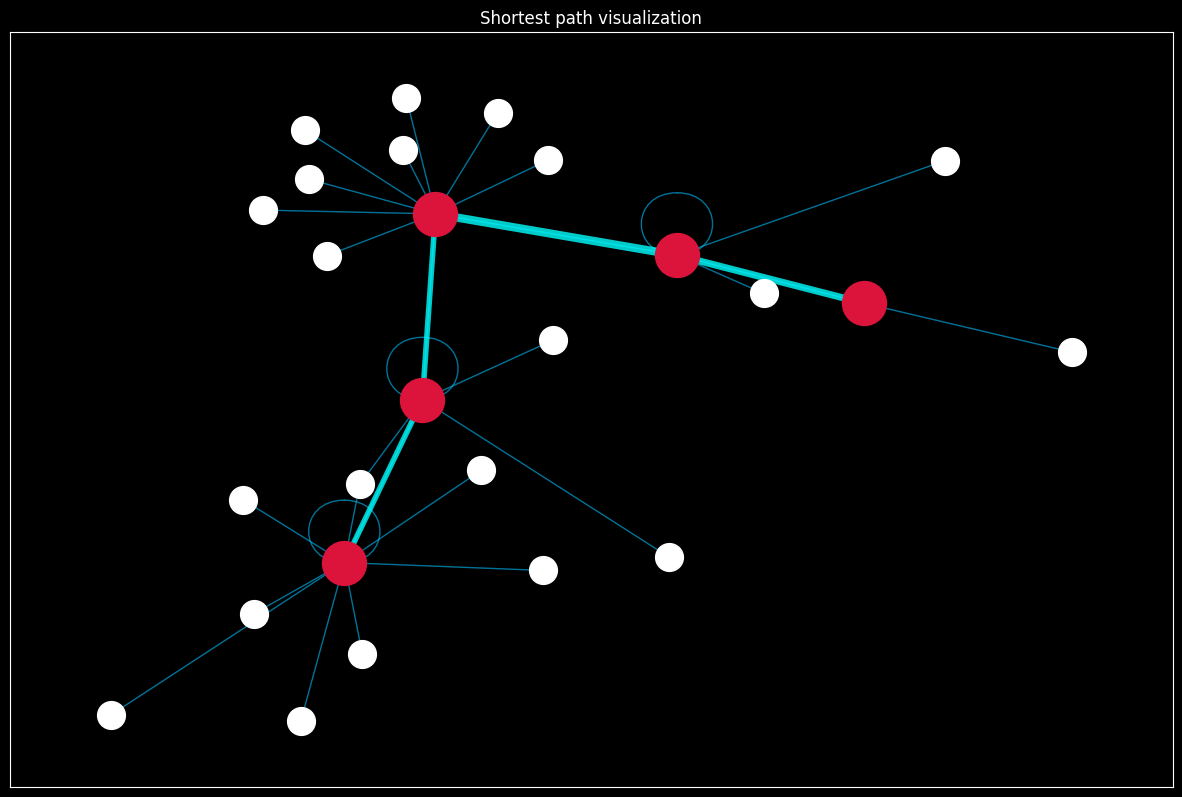

In [11]:
f.functionality3(20140101, 20140103, nodeStart, nodeEnd, users)

## Functionality 4 - Disconnecting graphs

For this function we implemented from scratch the BFS, DFS and Ford-Fulkerson algorithm for the Max-Flow.

First we created a copy of the initial dataframes to create a full dataframe with the weights, this because it was computationally more efficient to build the G1 and G2 graphs from a dataframe

In [5]:
a2q_weighted, c2a_weighted, c2q_weighted = a2q.copy(), c2a.copy(), c2q.copy()
a2q_weighted['weight'], c2a_weighted['weight'], c2q_weighted['weight'] = weights[0], weights[1], weights[2]

In [6]:
# first we concat our graphs into a single dataframe:
full_df = pd.concat([a2q_weighted, c2q_weighted, c2a_weighted])

In [7]:
# next we extract all edges (node tuples) for two intervals
i1_start =  20140103
i1_end =    20140105
i2_start =  20140104
i2_end =    20140106

G1_nodes = full_df[(full_df['date'] > i1_start) &  (full_df['date'] < i1_end)]
G2_nodes = full_df[(full_df['date'] > i2_start) &  (full_df['date'] < i2_end)]

In [8]:
G1 = f.build_graph_from_df(G1_nodes, graph)
G2 = f.build_graph_from_df(G2_nodes, graph)

Now we randomly select with this fucntion two unique nodes, one from each subgraph, such that there is a path between them.

In [15]:
G = nx.from_pandas_edgelist(pd.concat([G1_nodes, G2_nodes]),source='replier',target='questioner',edge_attr='weight', create_using=nx.DiGraph())
condition = False

while(not condition):
    node1, node2 = f.random_nodes(G1_nodes, G2_nodes)
    condition = f.bfs(G, node1, node2, {})

1965003 797225


We finally run the functionality that will output the graph by highlighting the edges that are part of the cut.

Extracting nodes
Merging dataframe
Computing min cut
Runnning visualization


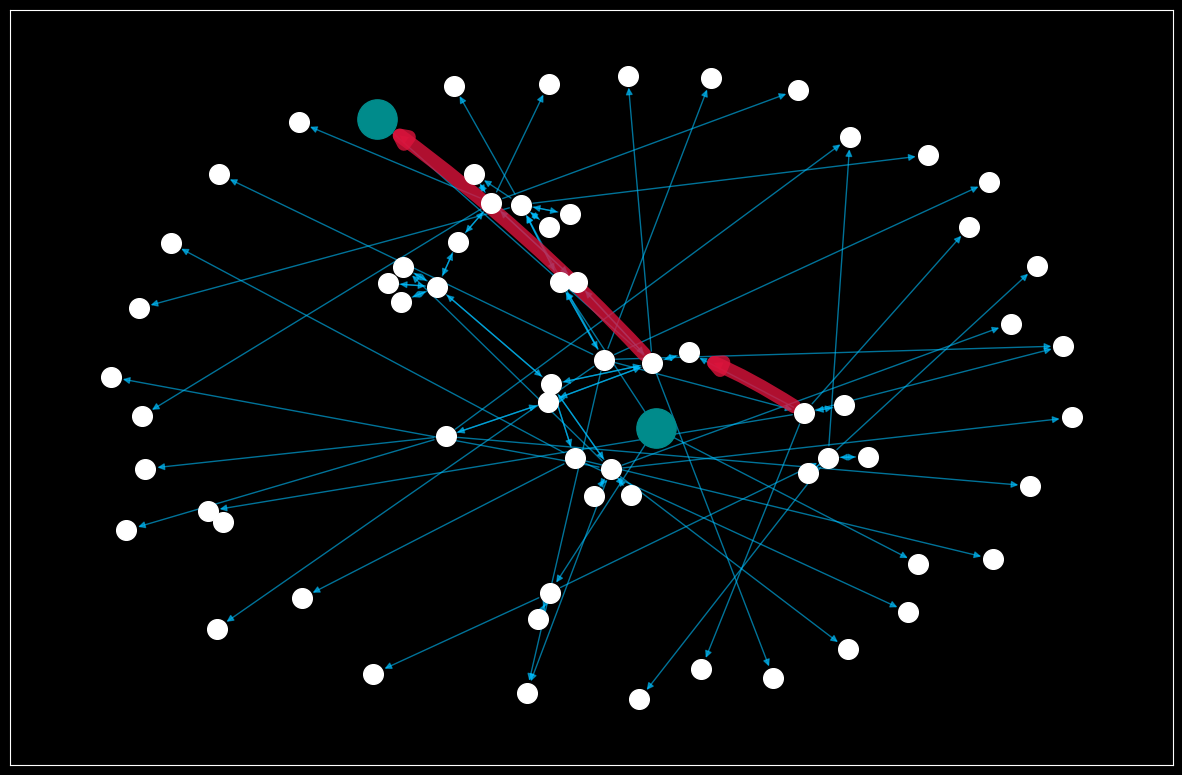

In [16]:
node1 = '1965003'
node2 = '797225'
cut, weight, links_amount = f.functionality4(i1_start, i1_end, i2_start, i2_end, full_df, node1, node2)